In [22]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from IPython.display import display

In [14]:
def concatenate_csv_files(folder_path, output_file):
    csv_files = [f for f in os.listdir(folder_path)]

    df_list = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"All CSV files have been combined into '{output_file}'.")

# Correct variable names and use raw strings
folder_path = r'C:\Users\OOKin\Downloads\uber-dataset'
output_file = r'C:\Users\OOKin\OneDrive\Desktop\PortfolioProjects\Uber-data-visualization-project\data\combined.csv'

# Call the function with the correct variable names
concatenate_csv_files(folder_path, output_file)


All CSV files have been combined into 'C:\Users\OOKin\OneDrive\Desktop\PortfolioProjects\Uber-data-visualization-project\data\combined.csv'.


In [17]:
[f for f in os.listdir(folder_path)]

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [54]:
df = pd.read_csv(output_file)

In [55]:
df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
4534322,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [59]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [61]:
#Change Date/Time datatype from object to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

In [68]:
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.strftime('%B')
df['day'] = df['Date/Time'].dt.day_name()
df['hours'] = df['Date/Time'].dt.strftime('%I %p')

In [80]:
df

,Date/Time,Lat,Lon,Base,Year,Month,day,hours
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,April,Tuesday,12 AM
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,April,Tuesday,12 AM
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,April,Tuesday,12 AM
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,April,Tuesday,12 AM
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,April,Tuesday,12 AM
...,...,...,...,...,...,...,...,...
4534322,2014-09-30 22:57:00,40.7668,-73.9845,B02764,2014,September,Tuesday,10 PM
4534323,2014-09-30 22:57:00,40.6911,-74.1773,B02764,2014,September,Tuesday,10 PM
4534324,2014-09-30 22:58:00,40.8519,-73.9319,B02764,2014,September,Tuesday,10 PM
4534325,2014-09-30 22:58:00,40.7081,-74.0066,B02764,2014,September,Tuesday,10 PM


In [70]:
#Save process data
df.to_csv(r'C:\Users\OOKin\OneDrive\Desktop\PortfolioProjects\Uber-data-visualization-project\data\df.csv',index=False)

##### Question 1. What are the peak hours for Uber pickups

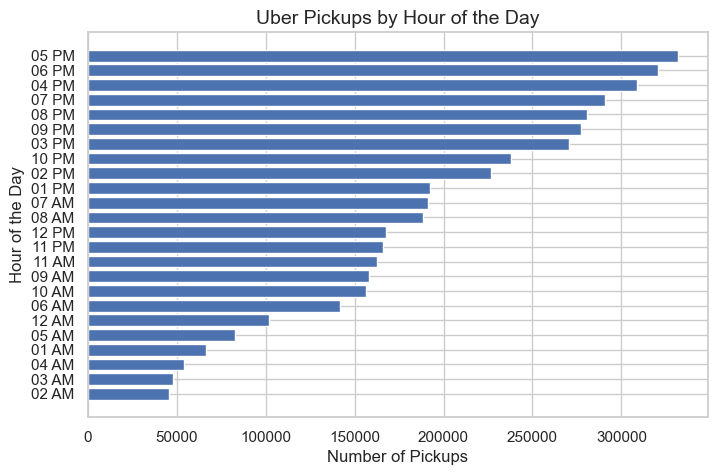

In [104]:
# Count number of trips per hour
hourly_counts = df['hours'].value_counts(ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(y=hourly_counts.index, width=hourly_counts.values)

# Labels and title
plt.xlabel('Number of Pickups', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.title('Uber Pickups by Hour of the Day', fontsize=14)
plt.yticks(ticks=range(0, 24))  # Ensure all hour labels show
#plt.tight_layout()

# Show the plot
plt.show()


##### Question 2. Which day(s) of the week have the highest ride volume?

C:\Users\OOKin\AppData\Local\Temp\ipykernel_14348\3852505626.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = df.groupby('day').size().reindex(weekday_order)


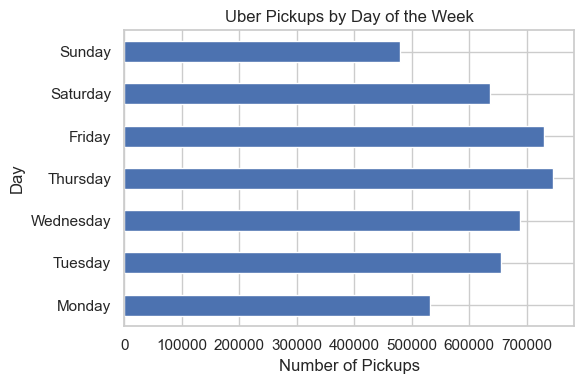

In [141]:
# Weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to ordered categorical type
df['day'] = pd.Categorical(df['day'], categories=weekday_order, ordered=True)

# Count trips per day and sort
daily_counts = df.groupby('day').size().reindex(weekday_order)

# Plot horizontal bar chart
plt.figure(figsize=(6, 4))
daily_counts.plot(kind='barh')
plt.title('Uber Pickups by Day of the Week')
plt.ylabel('Day')
plt.xlabel('Number of Pickups')
plt.tight_layout()
plt.show()


##### Question 3. Which Month(s) of have the highest ride volume?

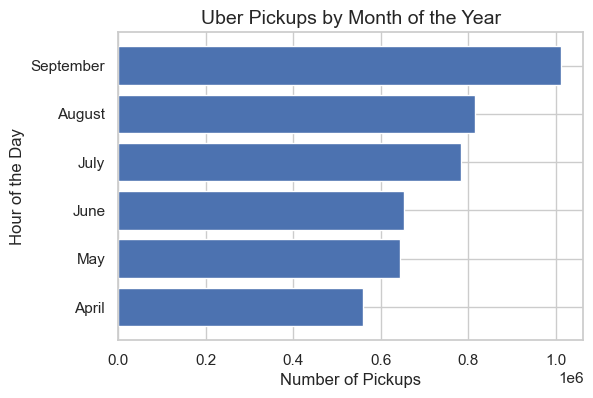

In [143]:
# Count number of trips per hour
hourly_counts = df['Month'].value_counts(ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(6, 4))
plt.barh(y=hourly_counts.index, width=hourly_counts.values)

# Labels and title
plt.xlabel('Number of Pickups', fontsize=12)
plt.ylabel('Hour of the Day', fontsize=12)
plt.title('Uber Pickups by Month of the Year', fontsize=14)
plt.yticks(ticks=range(0,6))  # Ensure all hour labels show
#plt.tight_layout()

# Show the plot
plt.show()


##### Question 4. Which areas in NYC have the highest Uber pickup concentrations?

In [138]:

# Filter valid NYC coordinates
df = df.dropna(subset=['Lat', 'Lon'])
df = df[(df['Lat'].between(40.5, 41)) & (df['Lon'].between(-74.1, -73.7))]

# Sample for performance (optional)
df_sample = df.sample(n=10000, random_state=1)

# Create base map centered around Manhattan
nyc_map = folium.Map(location=[40.75, -73.98], zoom_start=11, tiles='CartoDB positron')

# Create heatmap layer
heat_data = list(zip(df_sample['Lat'], df_sample['Lon']))
HeatMap(heat_data, radius=8, blur=12, min_opacity=0.2).add_to(nyc_map)

# Display the map inline
display(nyc_map)


##### Question 5. What’s the distribution of Uber trips across different hours and days (heatmap matrix)

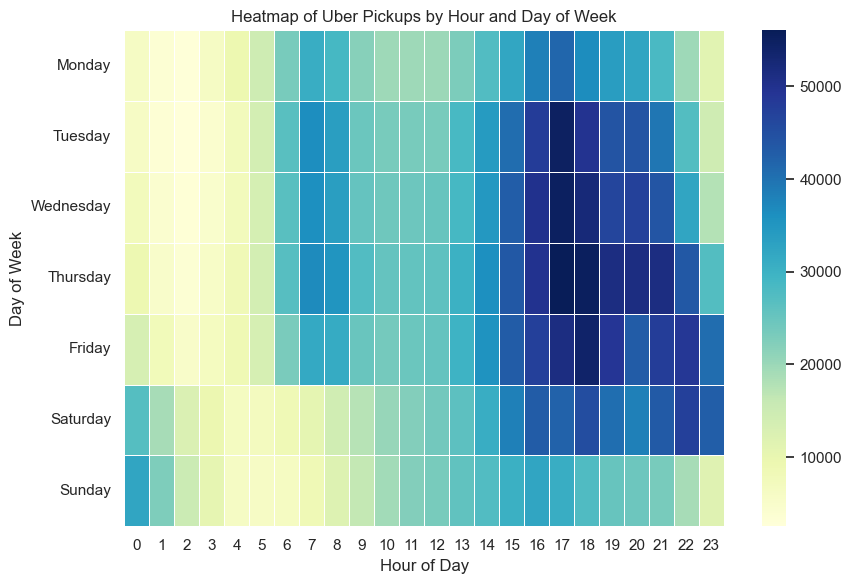

In [147]:
# Define weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=weekday_order, ordered=True)

# Create pivot table: rows = day, cols = hour, values = pickup counts
pivot_table = df.pivot_table(index='Weekday', columns='Hour', values='Base', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5, annot=False)

plt.title('Heatmap of Uber Pickups by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


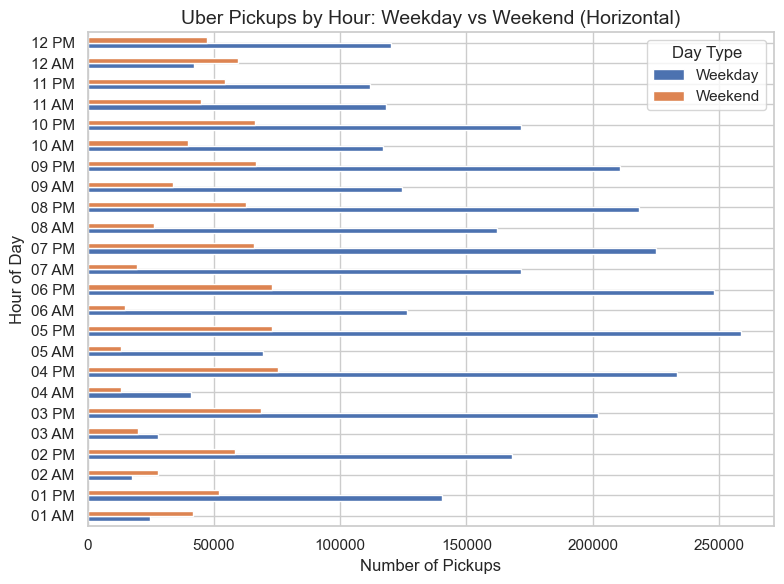

In [123]:
df['DayType'] = df['day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

df['DayType'].value_counts(normalize=True)

# Count trips per hour per day type
hour_counts = df.groupby(['hours', 'DayType']).size().unstack()

# Plot as horizontal bars
hour_counts.plot(kind='barh', figsize=(8, 6))

# Customize the chart
plt.title('Uber Pickups by Hour: Weekday vs Weekend', fontsize=14)
plt.ylabel('Hour of Day', fontsize=12)
plt.xlabel('Number of Pickups', fontsize=12)
plt.legend(title='Day Type')
plt.tight_layout()

# Show the plot
plt.show()


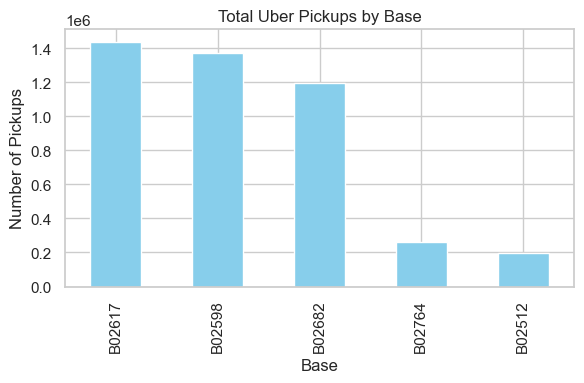

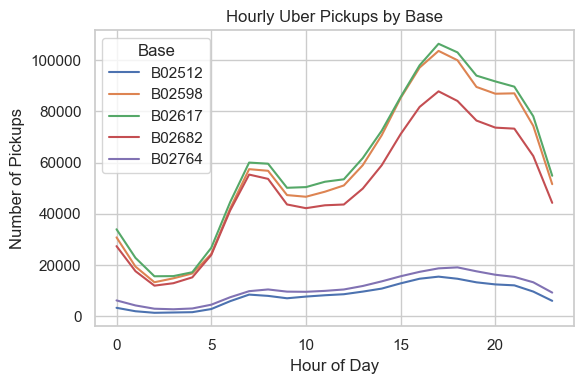

In [136]:
base_counts = df['Base'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
base_counts.plot(kind='bar', color='skyblue')
plt.title('Total Uber Pickups by Base')
plt.xlabel('Base')
plt.ylabel('Number of Pickups')
plt.tight_layout()
plt.show()

df['Hour'] = pd.to_datetime(df['Date/Time']).dt.hour

hourly_base = df.groupby(['Hour', 'Base']).size().unstack()

# Plot
hourly_base.plot(figsize=(6, 4))
plt.title('Hourly Uber Pickups by Base')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Base')
plt.tight_layout()
plt.show()


In [ ]:
Question 5. What’s the distribution of Uber trips across different hours and days (heatmap matrix)